In [255]:
#pip install geopandas

In [256]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns


# Read the full state file
mn_tracts = gpd.read_file('tl_2024_27_tract.zip')

# Filter for Hennepin County (FIPS code 053)
hennepin_tracts = mn_tracts[mn_tracts['COUNTYFP'] == '053']

# Save just Hennepin County if you want
hennepin_tracts.to_file('hennepin_tracts.shp')

In [257]:
mortgage_data = pd.read_csv('state_MN.csv')
mheaders = mortgage_data.columns
mheaders

<ipython-input-257-fa3d80490ffe>:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  mortgage_data = pd.read_csv('state_MN.csv')


Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_

In [258]:
# data set size
mortgage_data.shape

(246765, 99)

In [259]:
# filter by loan_purpose = 1 (home purchase)
mortgage_data = mortgage_data[mortgage_data['loan_purpose'] == 1]

In [260]:
covenent = pd.read_csv('Hennepin_County_Racial_Covenants_Table.csv')
cheaders = covenent.columns
cheaders

Index(['FID', 'Doc_ID', 'Deed_ID', 'Racial_Res', 'Type_Res', 'Addition',
       'City', 'Block', 'Lot', 'Grantor', 'Grantee', 'Date_Deed', 'Date_Ex',
       'Ex_Year', 'Join_ID', 'Workflow', 'Rel_Score', 'X', 'Y', 'Address',
       'Distance'],
      dtype='object')

In [261]:
pd.set_option('display.max_columns', None)
covenent.head()

,FID,Doc_ID,Deed_ID,Racial_Res,Type_Res,Addition,City,Block,Lot,Grantor,Grantee,Date_Deed,Date_Ex,Ex_Year,Join_ID,Workflow,Rel_Score,X,Y,Address,Distance
0,49,A773853,782_0191,No lots in this tract shall be sold or leased ...,NaN,LATHAMS MINNETONKA BLVD TRACT,ST. LOUIS PARK,2,2,Albert C. & Helen R. Jerome,A. B. Latham,10/13/1915,7/31/1915 0:00,1915,LATHAMS MINNETONKA BLVD TRACT 2 2,Zooniverse -- Abstracts,6.334159,-93.345780,44.951823,"5201 28th Street West, Saint Louis Park, 55416",1.022672
1,52,A2376250,1687_0285,"No lot, plot, or parcel shall be sold, leased,...",NaN,EDINA HIGHLANDS,EDINA,1,33,Frank J. Hannan,The Spring Company,6/21/1946,6/19/1946 0:00,1946,EDINA HIGHLANDS 1 33,Zooniverse -- Abstracts,6.522149,-93.361297,44.905837,"24 Address Unassigned, Edina, 55436",3.272984
2,96,A1974111,1449_0279,"No lot, plot, or parcel shall be sold, leased,...",NaN,SOUTH WHITE OAKS ADDN,EDINA,1,1,George A. Specht and Casimira Specht,Alice L. Breimon,5/25/1939,5/25/1939 0:00,1939,SOUTH WHITE OAKS ADDN 1 1,Zooniverse -- Abstracts,6.522149,-93.331998,44.915875,"4801 Townes Road, Edina, 55424",0.000000
3,229,M1645505,NaN,"premises shall not be sold, or leased, or occu...",NaN,WILCOX PARK MPLS,MINNEAPOLIS,3,9,Florence H. & Charles S. Brearly,John Theis,6/10/1931,6/14/1930 0:00,1930,WILCOX PARK MPLS 3 9,Manual,0.000000,-93.311423,45.032257,"4233 Russell Avenue North, Minneapolis, 55412",0.191220
4,247,A1556488,1188_0100,no person or persons other than of the Caucasi...,NaN,NOKOMIS SOUTH PARK ADDN TO MPLS,MINNEAPOLIS,8,20,George Pahl and Sophia Pahl,Aaron Larson,8/29/1929,5/21/1929 0:00,1929,NOKOMIS SOUTH PARK ADDN TO MPLS 8 20,Zooniverse -- Abstracts,6.334159,-93.233246,44.902271,"5543 27th Avenue South, Minneapolis, 55417",1.281485


In [262]:
covenant_slim = covenent[['FID', 'Racial_Res', 'Date_Deed', 'X', 'Y']]

In [263]:
mortgage_slim = mortgage_data[[
    'activity_year',
    'census_tract',
    'derived_race',
    'action_taken',
    'loan_amount',
    'property_value',
    'income',
    'interest_rate',
    'tract_minority_population_percent',
    'tract_to_msa_income_percentage',
    'denial_reason-1'
]]

In [264]:
# Convert covenant data to GeoDataFrame with correct initial CRS
geometry = [Point(xy) for xy in zip(covenant_slim['X'], covenant_slim['Y'])]
covenant_gdf = gpd.GeoDataFrame(covenant_slim, geometry=geometry)
covenant_gdf.set_crs(epsg=4326, inplace=True)  # WGS84 decimal degrees

print("Original covenant points:", len(covenant_gdf))

# Transform to match the tracts CRS (UTM Zone 15N)
covenant_gdf = covenant_gdf.to_crs(epsg=26915)

# Quick check of transformed coordinates
print("\nTransformed coordinate ranges:")
print("X range:", covenant_gdf.geometry.x.min(), "to", covenant_gdf.geometry.x.max())
print("Y range:", covenant_gdf.geometry.y.min(), "to", covenant_gdf.geometry.y.max())

# Verify these points fall within tract bounds
tract_bounds = hennepin_tracts.total_bounds
print("\nTract bounds:")
print("X range:", tract_bounds[0], "to", tract_bounds[2])
print("Y range:", tract_bounds[1], "to", tract_bounds[3])

# Perform spatial join with transformed coordinates
covenants_with_tracts = gpd.sjoin(covenant_gdf, hennepin_tracts, how='left', predicate='within')

# See how many points matched to tracts
print("\nPoints that matched to tracts:", len(covenants_with_tracts))
print("Points with null tract assignments:", covenants_with_tracts['TRACTCE'].isna().sum())

# Count covenants per tract
covenants_per_tract = covenants_with_tracts.dropna(subset=['TRACTCE']).groupby('TRACTCE').size().reset_index(name='covenant_count')

print("\nTract Summary:")
print("Number of tracts with covenants:", len(covenants_per_tract))
if len(covenants_per_tract) > 0:
    print("\nCovenant counts per tract:")
    print(covenants_per_tract['covenant_count'].describe())

Original covenant points: 24119

Transformed coordinate ranges:
X range: 446281.946653618 to 483902.6287368457
Y range: 4960740.396902054 to 5002300.463783714

Tract bounds:
X range: -93.768385 to -93.177218
Y range: 44.785106 to 45.246618

Points that matched to tracts: 24119
Points with null tract assignments: 24119

Tract Summary:
Number of tracts with covenants: 0


<ipython-input-264-e1e9ffcc61a4>:23: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:26915
Right CRS: EPSG:4269

  covenants_with_tracts = gpd.sjoin(covenant_gdf, hennepin_tracts, how='left', predicate='within')


In [265]:
def format_census_tract(value):
    try:
        # First convert to string to handle any type
        tract_str = str(value)
        # Remove any decimal points and trailing zeros
        tract_str = tract_str.split('.')[0]
        return tract_str
    except Exception as e:
        print(f"Error processing value: {value}, Type: {type(value)}")
        raise e

# Create a clean copy and try the conversion
mortgage_clean = mortgage_slim.copy()
mortgage_clean['census_tract'] = mortgage_clean['census_tract'].astype(str)
mortgage_clean['census_tract'] = mortgage_clean['census_tract'].apply(format_census_tract)

# Let's see what we got
print("\nAfter cleaning:")
print(mortgage_clean['census_tract'].head())


After cleaning:
3     27023950400
4     27019091201
6     27159480100
7     27123040102
10    27053009600
Name: census_tract, dtype: object


In [266]:
# Clean mortgage data - first ensure we have strings
mortgage_clean = mortgage_slim.copy()
mortgage_clean['census_tract'] = mortgage_clean['census_tract'].astype(str)
mortgage_clean['census_tract'] = mortgage_clean['census_tract'].str.replace('.0', '')

# Clean mortgage data - first ensure we have strings
mortgage_clean = mortgage_slim.copy()
mortgage_clean['census_tract'] = mortgage_clean['census_tract'].astype(str)
mortgage_clean['census_tract'] = mortgage_clean['census_tract'].str.replace('.0', '')



# First format the covenant census tract IDs
covenants_with_tracts['census_tract'] = (
    covenants_with_tracts['STATEFP'] +
    covenants_with_tracts['COUNTYFP'] +
    covenants_with_tracts['TRACTCE']
)

# Create the per-tract counts
covenants_per_tract = covenants_with_tracts.groupby('census_tract').size().reset_index(name='covenant_count')

# Clean the mortgage data
mortgage_clean = mortgage_slim.copy()
mortgage_clean['census_tract'] = mortgage_clean['census_tract'].astype(str).str.replace('.0', '')

# Verify the formats match
print("Mortgage data examples:")
print(mortgage_clean['census_tract'].head())
print("\nCovenant data examples:")
print(covenants_per_tract['census_tract'].head())






# Merge the datasets
combined_data = mortgage_clean.merge(
    covenants_per_tract,
    on='census_tract',
    how='left'
)

# Fill NaN covenant counts with 0
combined_data['covenant_count'] = combined_data['covenant_count'].fillna(0)

# Basic Analysis
print("\nMerge Results:")
print("Total mortgage applications:", len(combined_data))
print("Applications in tracts with covenants:", (combined_data['covenant_count'] > 0).sum())
print("Unique tracts with covenants:", combined_data[combined_data['covenant_count'] > 0]['census_tract'].nunique())

# Calculate approval rates
combined_data['was_approved'] = combined_data['action_taken'].isin([1, 2])
covenant_areas = combined_data['covenant_count'] > 0

print("\nApproval Rates:")
print("Tracts with no covenants:",
      combined_data[~covenant_areas]['was_approved'].mean())
print("Tracts with covenants:",
      combined_data[covenant_areas]['was_approved'].mean())

Mortgage data examples:
3     27023950400
4     27019091201
6     27159480100
7     27123040102
10    27053009600
Name: census_tract, dtype: object

Covenant data examples:
Series([], Name: census_tract, dtype: object)

Merge Results:
Total mortgage applications: 125400
Applications in tracts with covenants: 0
Unique tracts with covenants: 0

Approval Rates:
Tracts with no covenants: 0.6701754385964912
Tracts with covenants: nan


In [267]:
combined_data.columns

Index(['activity_year', 'census_tract', 'derived_race', 'action_taken',
       'loan_amount', 'property_value', 'income', 'interest_rate',
       'tract_minority_population_percent', 'tract_to_msa_income_percentage',
       'denial_reason-1', 'covenant_count', 'was_approved'],
      dtype='object')

In [268]:
df = combined_data.copy()

In [269]:
df.head(100)

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved
0,2022,27023950400,White,1,115000.0,125000,47.0,3.25,8.92,90.13,10,0.0,True
1,2022,27019091201,White,1,285000.0,295000,58.0,5.32,9.74,82.00,10,0.0,True
2,2022,27159480100,White,1,255000.0,335000,68.0,6.375,5.87,82.22,10,0.0,True
3,2022,27123040102,Race Not Available,1,365000.0,415000,167.0,5.99,10.43,133.52,10,0.0,True
4,2022,27053009600,Race Not Available,1,245000.0,255000,62.0,6.25,37.55,88.30,10,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022,27019090702,Asian,1,275000.0,345000,151.0,4.99,23.23,173.90,10,0.0,True
96,2022,27163070304,White,1,595000.0,745000,366.0,4.775,13.75,117.26,10,0.0,True
97,2022,27109001902,White,1,235000.0,295000,138.0,6.25,9.35,131.11,10,0.0,True
98,2022,27009020203,White,1,245000.0,255000,55.0,3.5,5.58,114.04,10,0.0,True


In [270]:
# Count race values

df['derived_race'].value_counts()

# Delete Race Not Available

df = df[(df['derived_race'] != 'Race Not Available') & (df['derived_race'] != 'Free Form Text Only')]

In [271]:
df['derived_race'].value_counts()

,count
derived_race,
White,76963
Asian,6704
Black or African American,5393
Joint,2753
American Indian or Alaska Native,678
2 or more minority races,187
Native Hawaiian or Other Pacific Islander,123


In [272]:
# Delete all nulls

df = df.dropna()

In [273]:
# Take value counts of race

df['derived_race'].value_counts()

,count
derived_race,
White,62606
Asian,4866
Black or African American,3733
Joint,2161
American Indian or Alaska Native,494
2 or more minority races,123
Native Hawaiian or Other Pacific Islander,60


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74043 entries, 0 to 125399
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   activity_year                      74043 non-null  int64  
 1   census_tract                       74043 non-null  object 
 2   derived_race                       74043 non-null  object 
 3   action_taken                       74043 non-null  int64  
 4   loan_amount                        74043 non-null  float64
 5   property_value                     74043 non-null  object 
 6   income                             74043 non-null  float64
 7   interest_rate                      74043 non-null  object 
 8   tract_minority_population_percent  74043 non-null  float64
 9   tract_to_msa_income_percentage     74043 non-null  float64
 10  denial_reason-1                    74043 non-null  int64  
 11  covenant_count                     74043 non-null  float64

# Part 1: Initial Analysis

## Analyze Covenent Density with Property Values

In [275]:
df_covenant = pd.read_csv('mortgage_covenant_data.csv')

In [276]:
df_covenant.dropna(subset=['property_value', 'income','interest_rate'])

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
62,2023,2.716307e+10,Race Not Available,6,475000.0,595000.0,168.0,6.375,8.11,128.09,10,0.0,False,NaN
63,2023,2.703706e+10,Race Not Available,6,645000.0,805000.0,207.0,6.000,8.87,101.88,10,0.0,False,NaN
65,2023,2.713908e+10,White,1,525000.0,555000.0,277.0,5.750,25.71,144.96,10,0.0,True,NaN
70,2023,2.705301e+10,White,1,665000.0,785000.0,182.0,8.625,41.44,15.77,10,0.0,True,NaN
313,2023,2.705313e+10,White,1,365000.0,435000.0,91.0,7.250,16.59,126.61,10,0.0,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100918,2023,2.703706e+10,White,1,225000.0,285000.0,58.0,7.625,41.69,93.84,10,0.0,True,NaN
100919,2023,2.705913e+10,White,1,225000.0,225000.0,56.0,8.125,6.32,75.93,10,0.0,True,NaN
100921,2023,2.711196e+10,White,1,255000.0,315000.0,129.0,7.125,4.41,114.73,10,0.0,True,NaN
100922,2023,2.705311e+10,Joint,1,295000.0,615000.0,209.0,6.125,22.63,106.99,10,2.0,True,Low (1-50)


In [297]:
df_covenant['covenant_count'].value_counts()
df_covenant[df_covenant['covenant_count'] != 0]

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density,race_binary
354,2023,2.705310e+10,White,3,175000.0,185000.0,54.0,NaN,54.09,65.09,1,9.0,False,Low (1-50),1
937,2023,2.705310e+10,Asian,1,165000.0,175000.0,55.0,5.500,54.09,65.09,10,9.0,True,Low (1-50),0
1183,2023,2.705310e+10,White,1,145000.0,155000.0,60.0,6.125,55.05,68.08,10,60.0,True,Medium (51-100),1
1678,2023,2.705302e+10,White,1,175000.0,195000.0,65.0,7.250,24.74,92.48,10,653.0,True,Very High (>200),1
1690,2023,2.705302e+10,White,1,115000.0,145000.0,216.0,7.250,18.91,149.30,10,317.0,True,Very High (>200),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99932,2023,2.705311e+10,White,1,195000.0,195000.0,56.0,6.750,32.81,98.37,10,1.0,True,Low (1-50),1
99959,2023,2.705311e+10,White,1,105000.0,185000.0,60.0,7.375,22.63,106.99,10,2.0,True,Low (1-50),1
100045,2023,2.705300e+10,White,3,185000.0,195000.0,46.0,NaN,65.01,46.38,1,213.0,False,Very High (>200),1
100063,2023,2.705311e+10,White,1,105000.0,135000.0,80.0,7.625,38.52,79.30,10,1.0,True,Low (1-50),1


In [299]:
df_covenant['race_binary'] = (df_covenant['derived_race'] == 'White').astype(int)

In [305]:
df_covenant.groupby('race_binary')['covenant_count'].describe()

,count,mean,std,min,25%,50%,75%,max
race_binary,,,,,,,,
0,4269.0,5.959241,42.108751,0.0,0.0,0.0,0.0,561.0
1,9692.0,4.948617,41.569669,0.0,0.0,0.0,0.0,965.0


In [298]:
# Eliminate property value less than 200000

# Convert 'property_value' to numeric before comparison
df_covenant['property_value'] = pd.to_numeric(df_covenant['property_value'], errors='coerce')

# Now perform the filtering
df_covenant = df_covenant[df_covenant['property_value'] < 200000]

In [283]:
df['interest_rate'] = pd.to_numeric(df['interest_rate'], errors='coerce').astype(float)
df['property_value'] = pd.to_numeric(df['property_value'], errors='coerce').astype(float)

<ipython-input-284-0af1ac9025cf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='derived_race', y='income', data=df_income[df_income['was_approved'] == 1], ax=axes[0], palette="pastel")
<ipython-input-284-0af1ac9025cf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='derived_race', y='income', data=df_income[df_income['was_approved'] == 0], ax=axes[1], palette="muted")


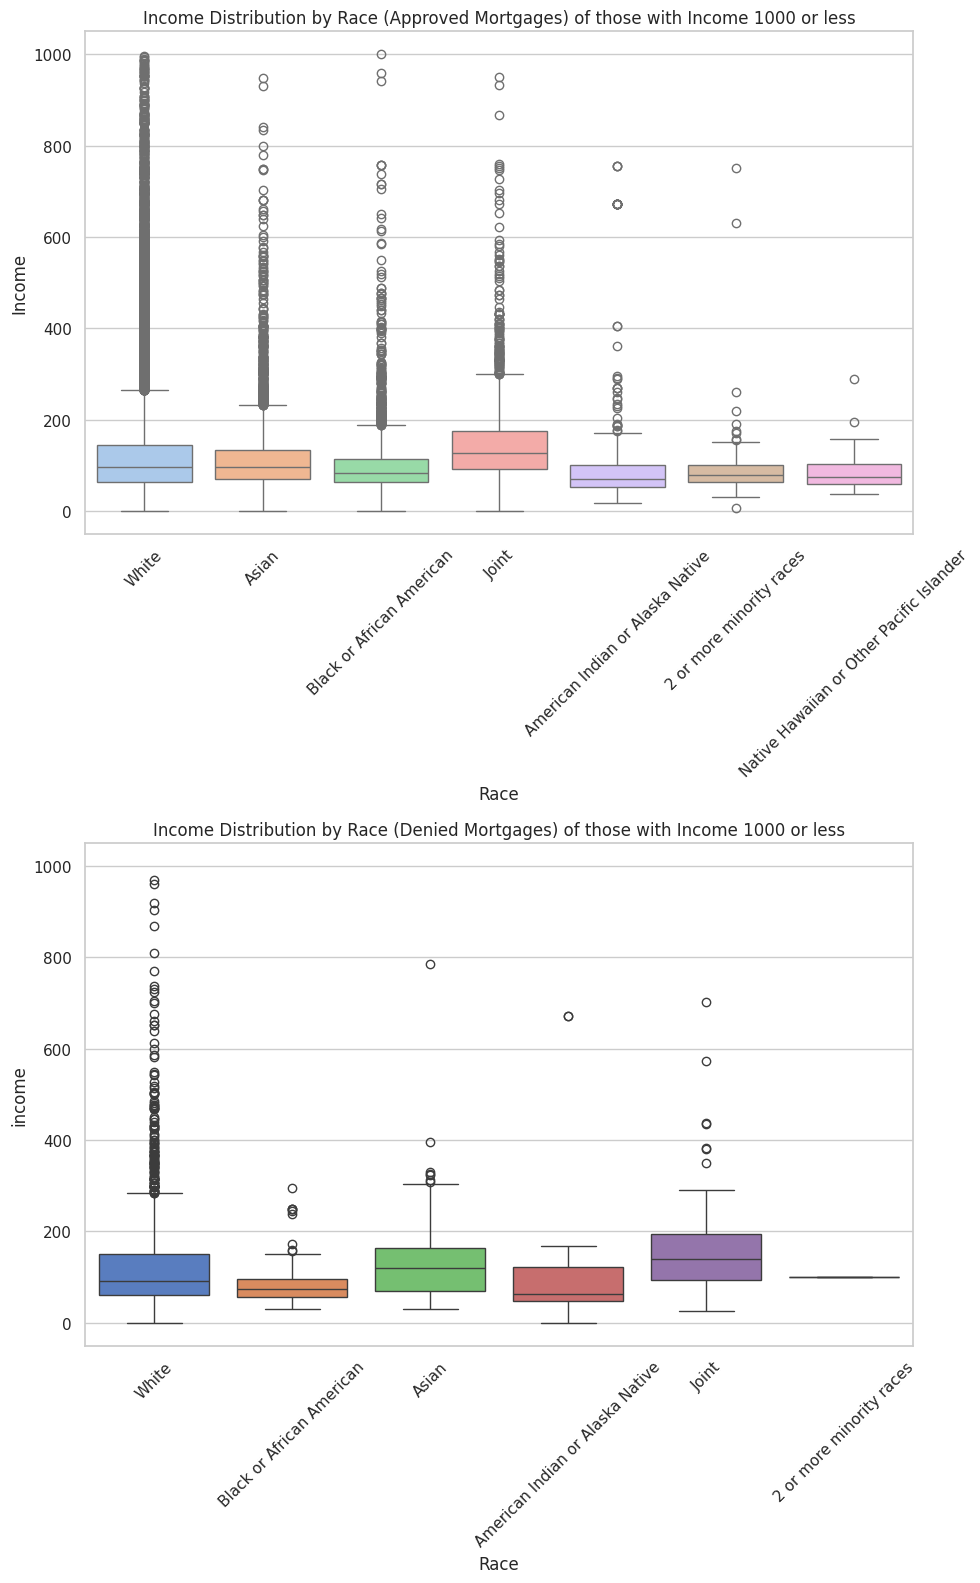

In [284]:
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 16), sharey=True)

# Box Plot for Income by Race (Approved Mortgages)
sns.boxplot(x='derived_race', y='income', data=df_income[df_income['was_approved'] == 1], ax=axes[0], palette="pastel")
axes[0].set_title("Income Distribution by Race (Approved Mortgages) of those with Income 1000 or less")
axes[0].set_xlabel("Race")
axes[0].set_ylabel("Income")
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Box Plot for Income by Race (Denied Mortgages)
sns.boxplot(x='derived_race', y='income', data=df_income[df_income['was_approved'] == 0], ax=axes[1], palette="muted")
axes[1].set_title("Income Distribution by Race (Denied Mortgages) of those with Income 1000 or less")
axes[1].set_xlabel("Race")
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout and show plots
plt.tight_layout()
plt.show()

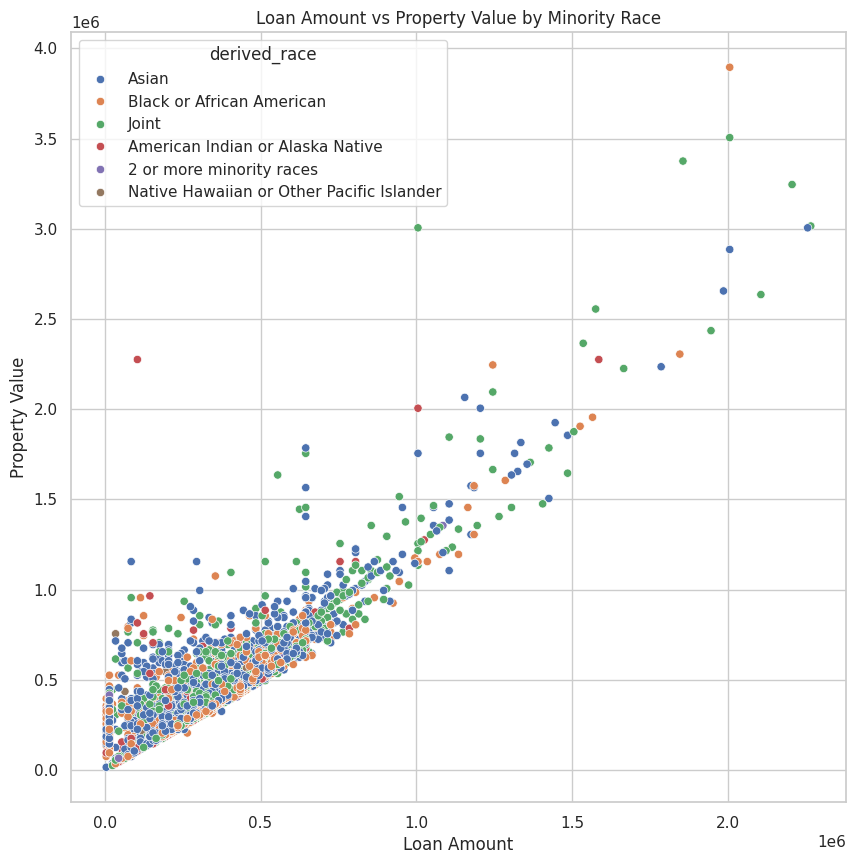

In [307]:
# Create plot of loan_amount vs	property_value hued by race

# Set the style

sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x='loan_amount', y='property_value', hue='derived_race', data=df_minority, palette='deep')

# Add labels and title
plt.title('Loan Amount vs Property Value by Minority Race')
plt.xlabel('Loan Amount')
plt.ylabel('Property Value')

# Show the plot
plt.show()

In [319]:
df_covenant = df_covenant[(df_covenant['income'] <= 200) & (df_covenant['income'] >= 0)]

<ipython-input-320-b1ea3fafb6cc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='derived_race', y='tract_minority_population_percent', data=df_covenant, palette='muted', ax=axes[0])
<ipython-input-320-b1ea3fafb6cc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='derived_race', y='income', data=df_covenant, palette='muted', ax=axes[1])


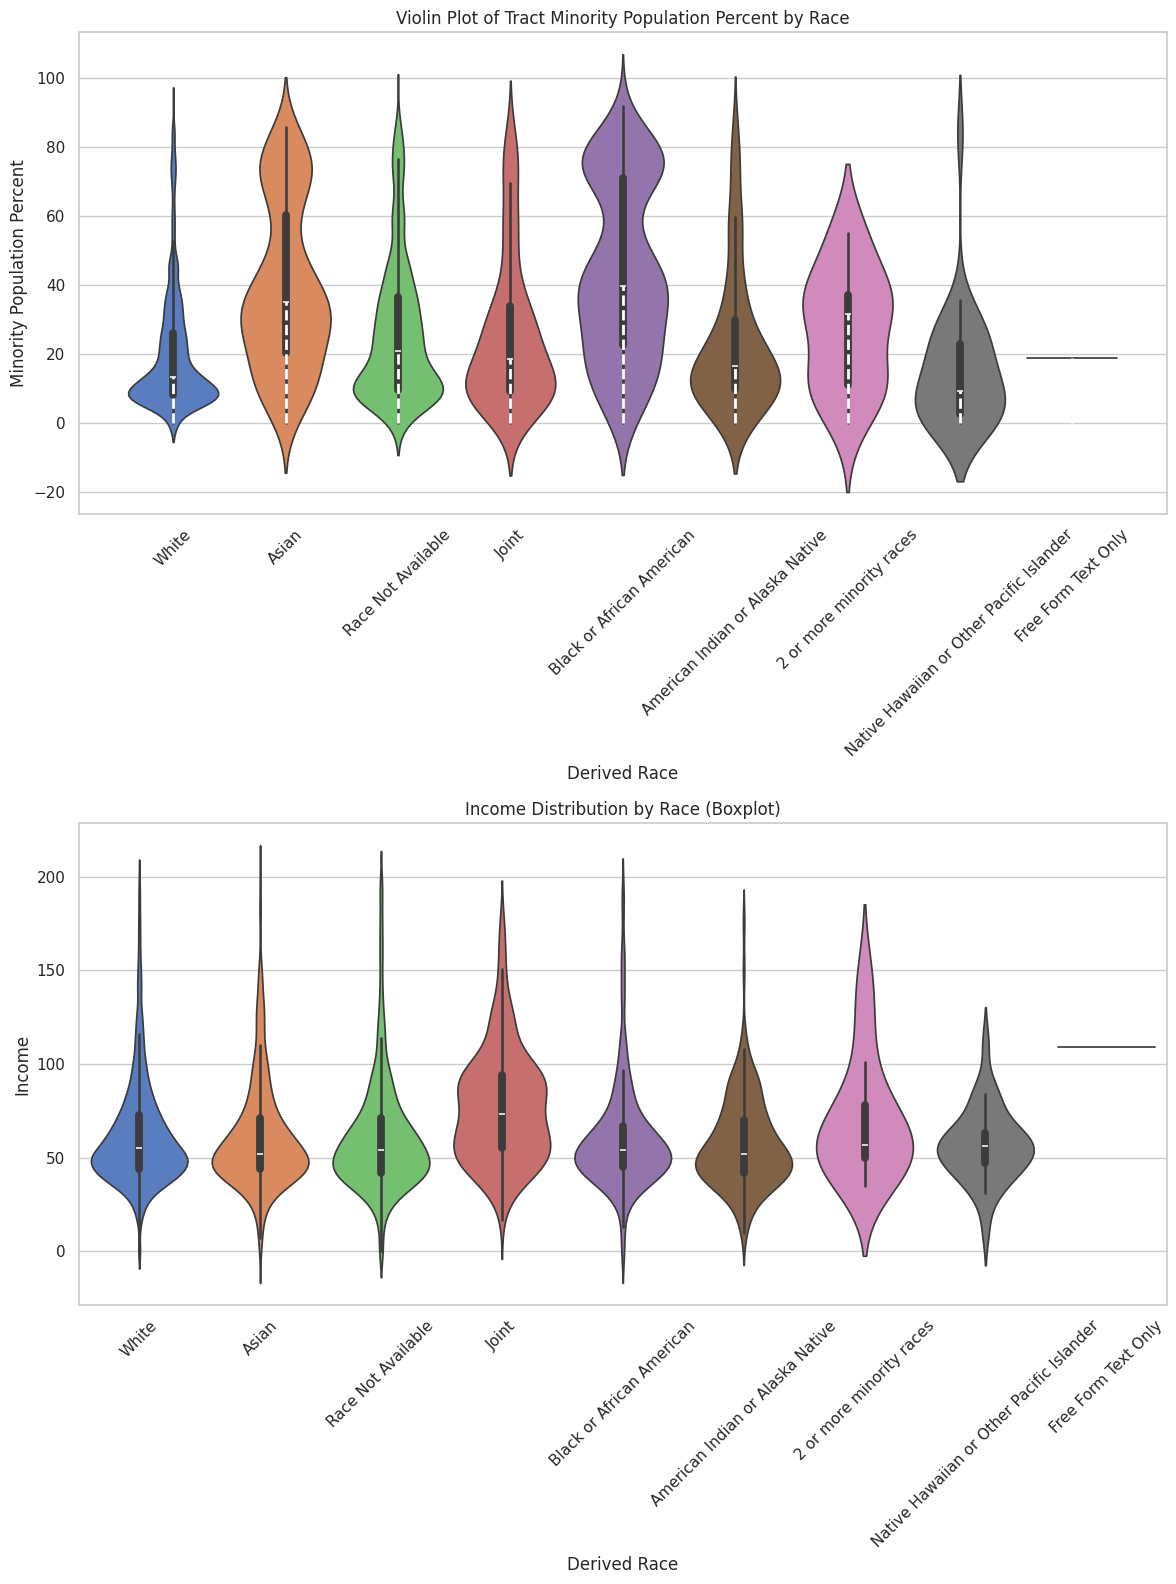

In [320]:
# Create plots

sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot the Violin plot for tract_minority_population_percent by derived_race
sns.violinplot(x='derived_race', y='tract_minority_population_percent', data=df_covenant, palette='muted', ax=axes[0])
axes[0].set_title('Violin Plot of Tract Minority Population Percent by Race')
axes[0].set_xlabel('Derived Race')
axes[0].set_ylabel('Minority Population Percent')
plt.setp(axes[0].get_xticklabels(), rotation=45)
for i in df_covenant['derived_race'].unique():
    median_val = df_covenant[df_covenant['derived_race'] == i]['tract_minority_population_percent'].median()
    axes[0].plot([i, i], [0, median_val], color='white', lw=2, ls='--')

# Plot the Boxplot for income by derived_race
sns.violinplot(x='derived_race', y='income', data=df_covenant, palette='muted', ax=axes[1])
axes[1].set_title('Income Distribution by Race (Boxplot)')
axes[1].set_xlabel('Derived Race')
axes[1].set_ylabel('Income')
plt.setp(axes[1].get_xticklabels(), rotation=45)
# Adjust the layout for better spacing
plt.tight_layout()

# Create vertical space between the subplots
plt.subplots_adjust(wspace=0.5)
# Show the plot
plt.show()

# Part 2: Bias Investigation

In [322]:
df_income = df[(df['income'] <= 500) & (df['income'] >= 0)]

In [323]:
df_white = df_income[df_income['derived_race'] == 'White']
df_minority = df_income[df_income['derived_race'] != 'White']

<ipython-input-324-dd8717f39855>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white['property_value'] = pd.to_numeric(df_white['property_value'], errors='coerce')
<ipython-input-324-dd8717f39855>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white['interest_rate'] = pd.to_numeric(df_white['interest_rate'], errors='coerce')
<ipython-input-324-dd8717f39855>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

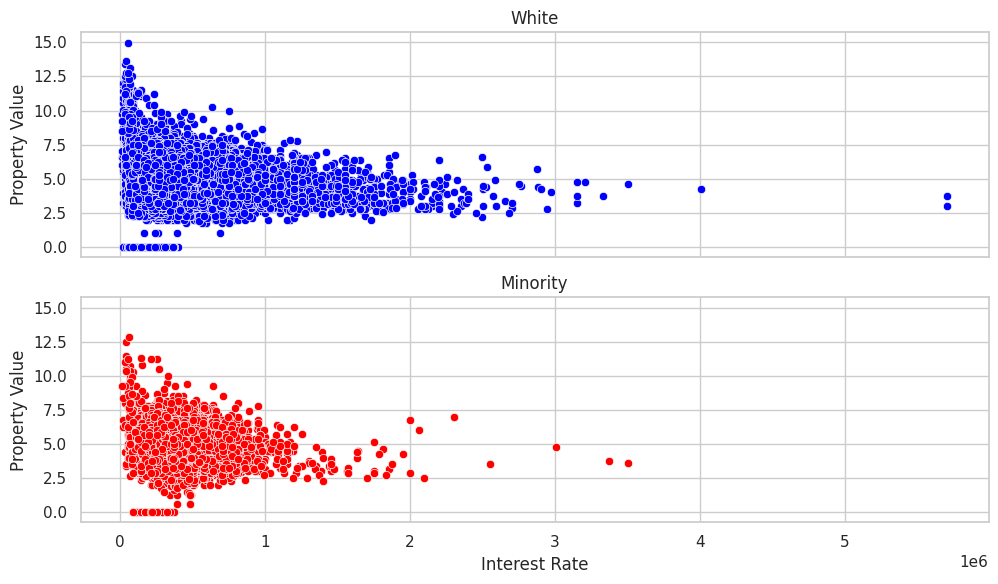

In [324]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharey=True, sharex=True)
plt.title("Scatterplots of Interest Rate vs. Property Value by Race")

# Convert 'property_value' and 'interest_rate' to numeric if they are not already
df_white['property_value'] = pd.to_numeric(df_white['property_value'], errors='coerce')
df_white['interest_rate'] = pd.to_numeric(df_white['interest_rate'], errors='coerce')

# Now create the scatterplot
sns.scatterplot(x='property_value', y='interest_rate', data=df_white, ax=axes[0], color='blue')


axes[0].set_title("White")
axes[0].set_xlabel("Interest Rate")
axes[0].set_ylabel("Property Value")

# Convert 'property_value' and 'interest_rate' to numeric if they are not already for df_minority
df_minority['property_value'] = pd.to_numeric(df_minority['property_value'], errors='coerce')
df_minority['interest_rate'] = pd.to_numeric(df_minority['interest_rate'], errors='coerce')

sns.scatterplot(x='property_value', y='interest_rate', data=df_minority, ax=axes[1], color='red')
axes[1].set_title("Minority")
axes[1].set_xlabel("Interest Rate")
axes[1].set_ylabel("Property Value")

# Flatten axes array for easy iteration
axes = axes.flatten()
# Adjust layout for clarity

plt.tight_layout()
plt.show()

In [325]:
df_income['derived_race'].value_counts()

,count
derived_race,
White,61663
Asian,4812
Black or African American,3710
Joint,2125
American Indian or Alaska Native,478
2 or more minority races,121
Native Hawaiian or Other Pacific Islander,60


In [326]:
# Take percentages of each race with total

df['derived_race'].value_counts(normalize=True)
df['derived_race'].value_counts(normalize=True) * 100

,proportion
derived_race,
White,84.553570
Asian,6.571857
Black or African American,5.041665
Joint,2.918574
American Indian or Alaska Native,0.667180
2 or more minority races,0.166120
Native Hawaiian or Other Pacific Islander,0.081034


<ipython-input-327-499b01413900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minority['interest_rate'] = pd.to_numeric(df_minority['interest_rate'], errors='coerce')
<ipython-input-327-499b01413900>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minority['property_value'] = pd.to_numeric(df_minority['property_value'], errors='coerce')
<ipython-input-327-499b01413900>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

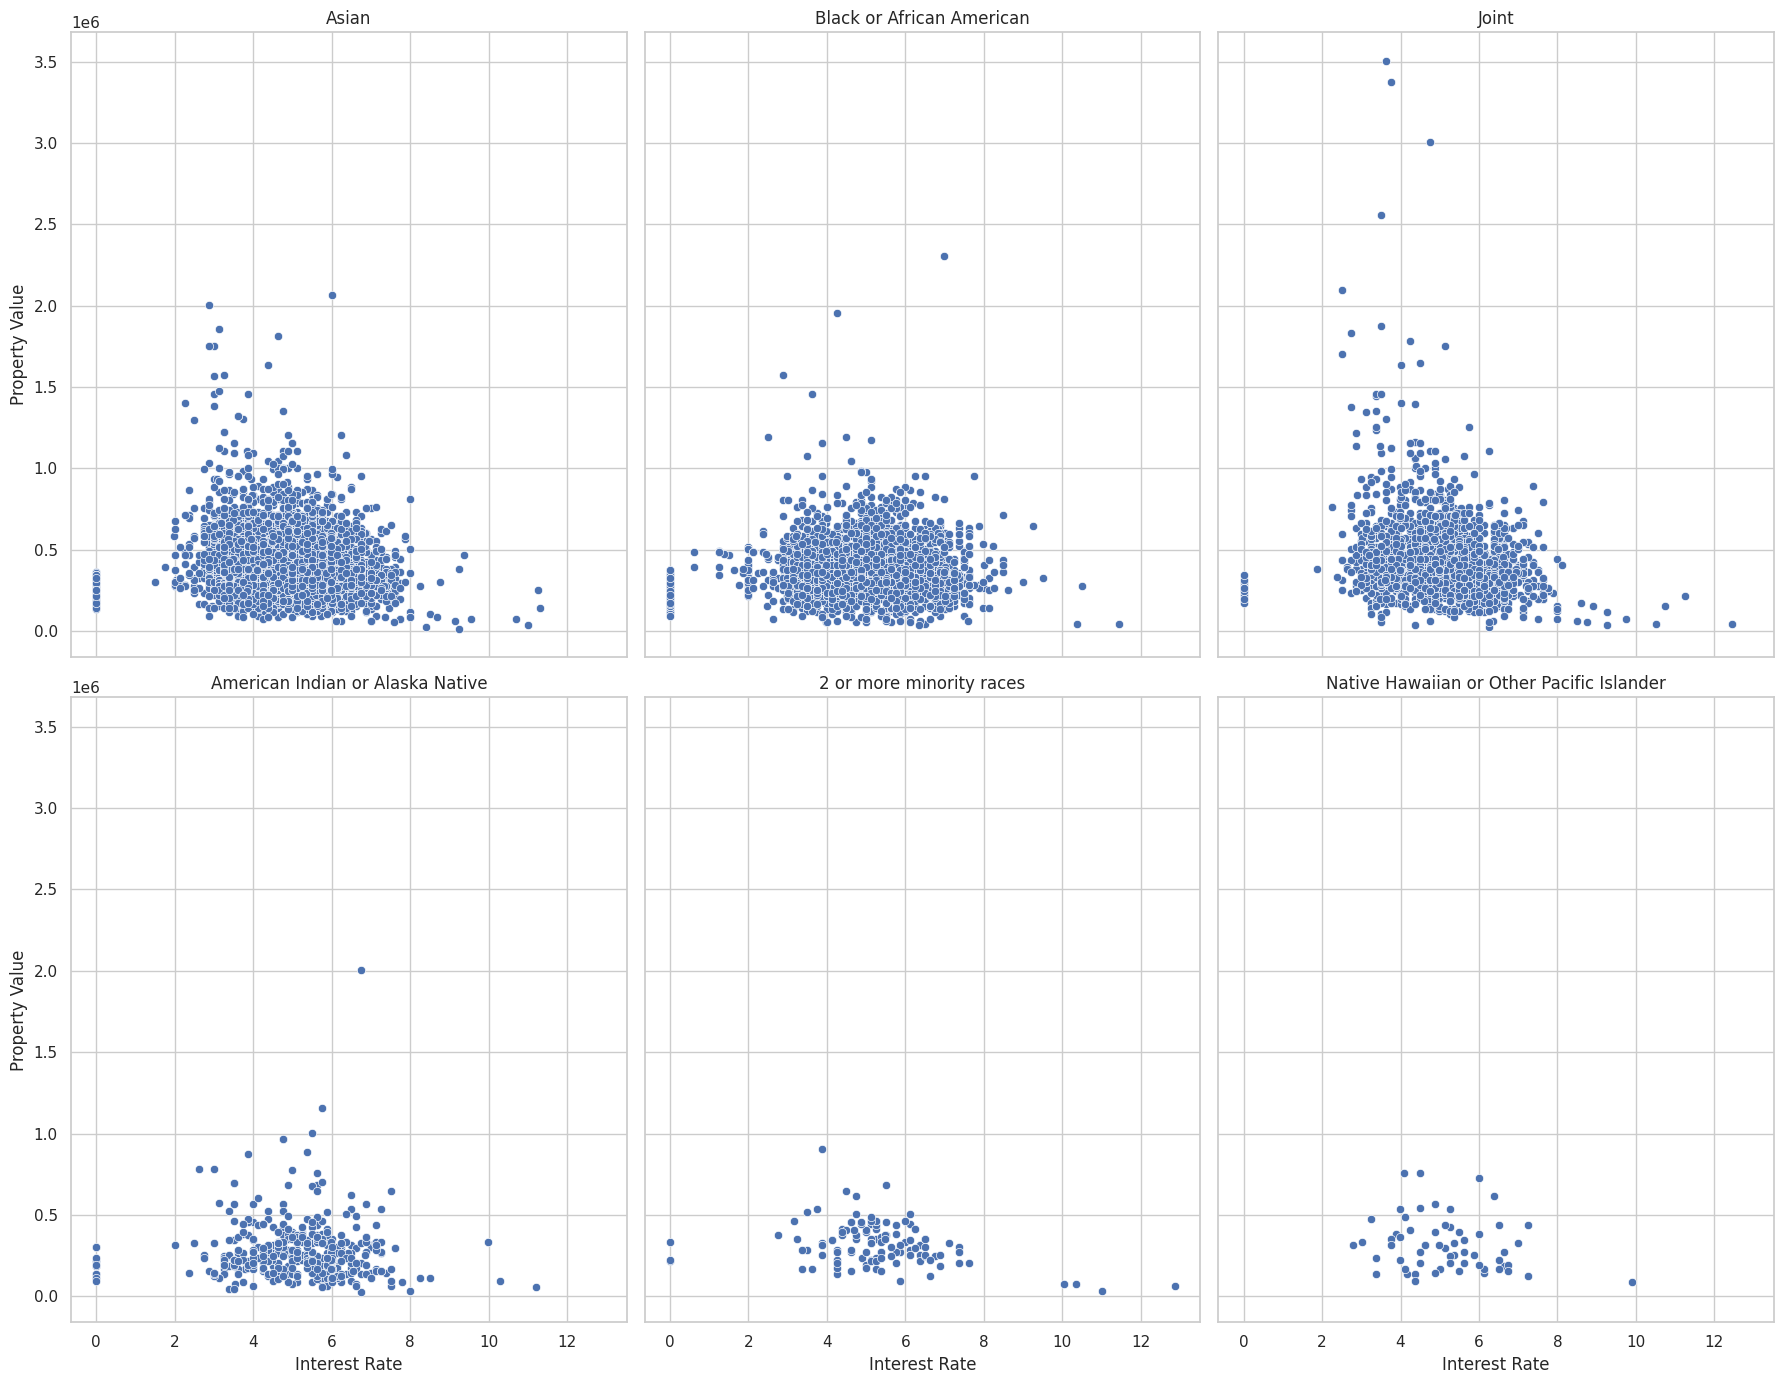

In [327]:
# Convert 'interest_rate' and 'property_value' to numeric types
df_minority['interest_rate'] = pd.to_numeric(df_minority['interest_rate'], errors='coerce')
df_minority['property_value'] = pd.to_numeric(df_minority['property_value'], errors='coerce')

sns.set_style("whitegrid")

# Get unique races
races = df_minority['derived_race'].unique()

# Create subplots in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 14), sharey=True, sharex=True)
plt.title("Scatterplots of Interest Rate vs. Property Value by Race")
# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through races and create scatterplots
for i, race in enumerate(races):
    subset = df_minority[df_minority['derived_race'] == race]
    # Ensure 'interest_rate' and 'property_value' are treated as numeric in the subset
    subset['interest_rate'] = pd.to_numeric(subset['interest_rate'], errors='coerce')
    subset['property_value'] = pd.to_numeric(subset['property_value'], errors='coerce')
    sns.scatterplot(x='interest_rate', y='property_value', data=subset, ax=axes[i])
    axes[i].set_title(f"{race}")
    axes[i].set_xlabel("Interest Rate")
    axes[i].set_ylabel("Property Value")

# Hide any unused subplots (if fewer than 6 races)
for j in range(len(races), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for clarity

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

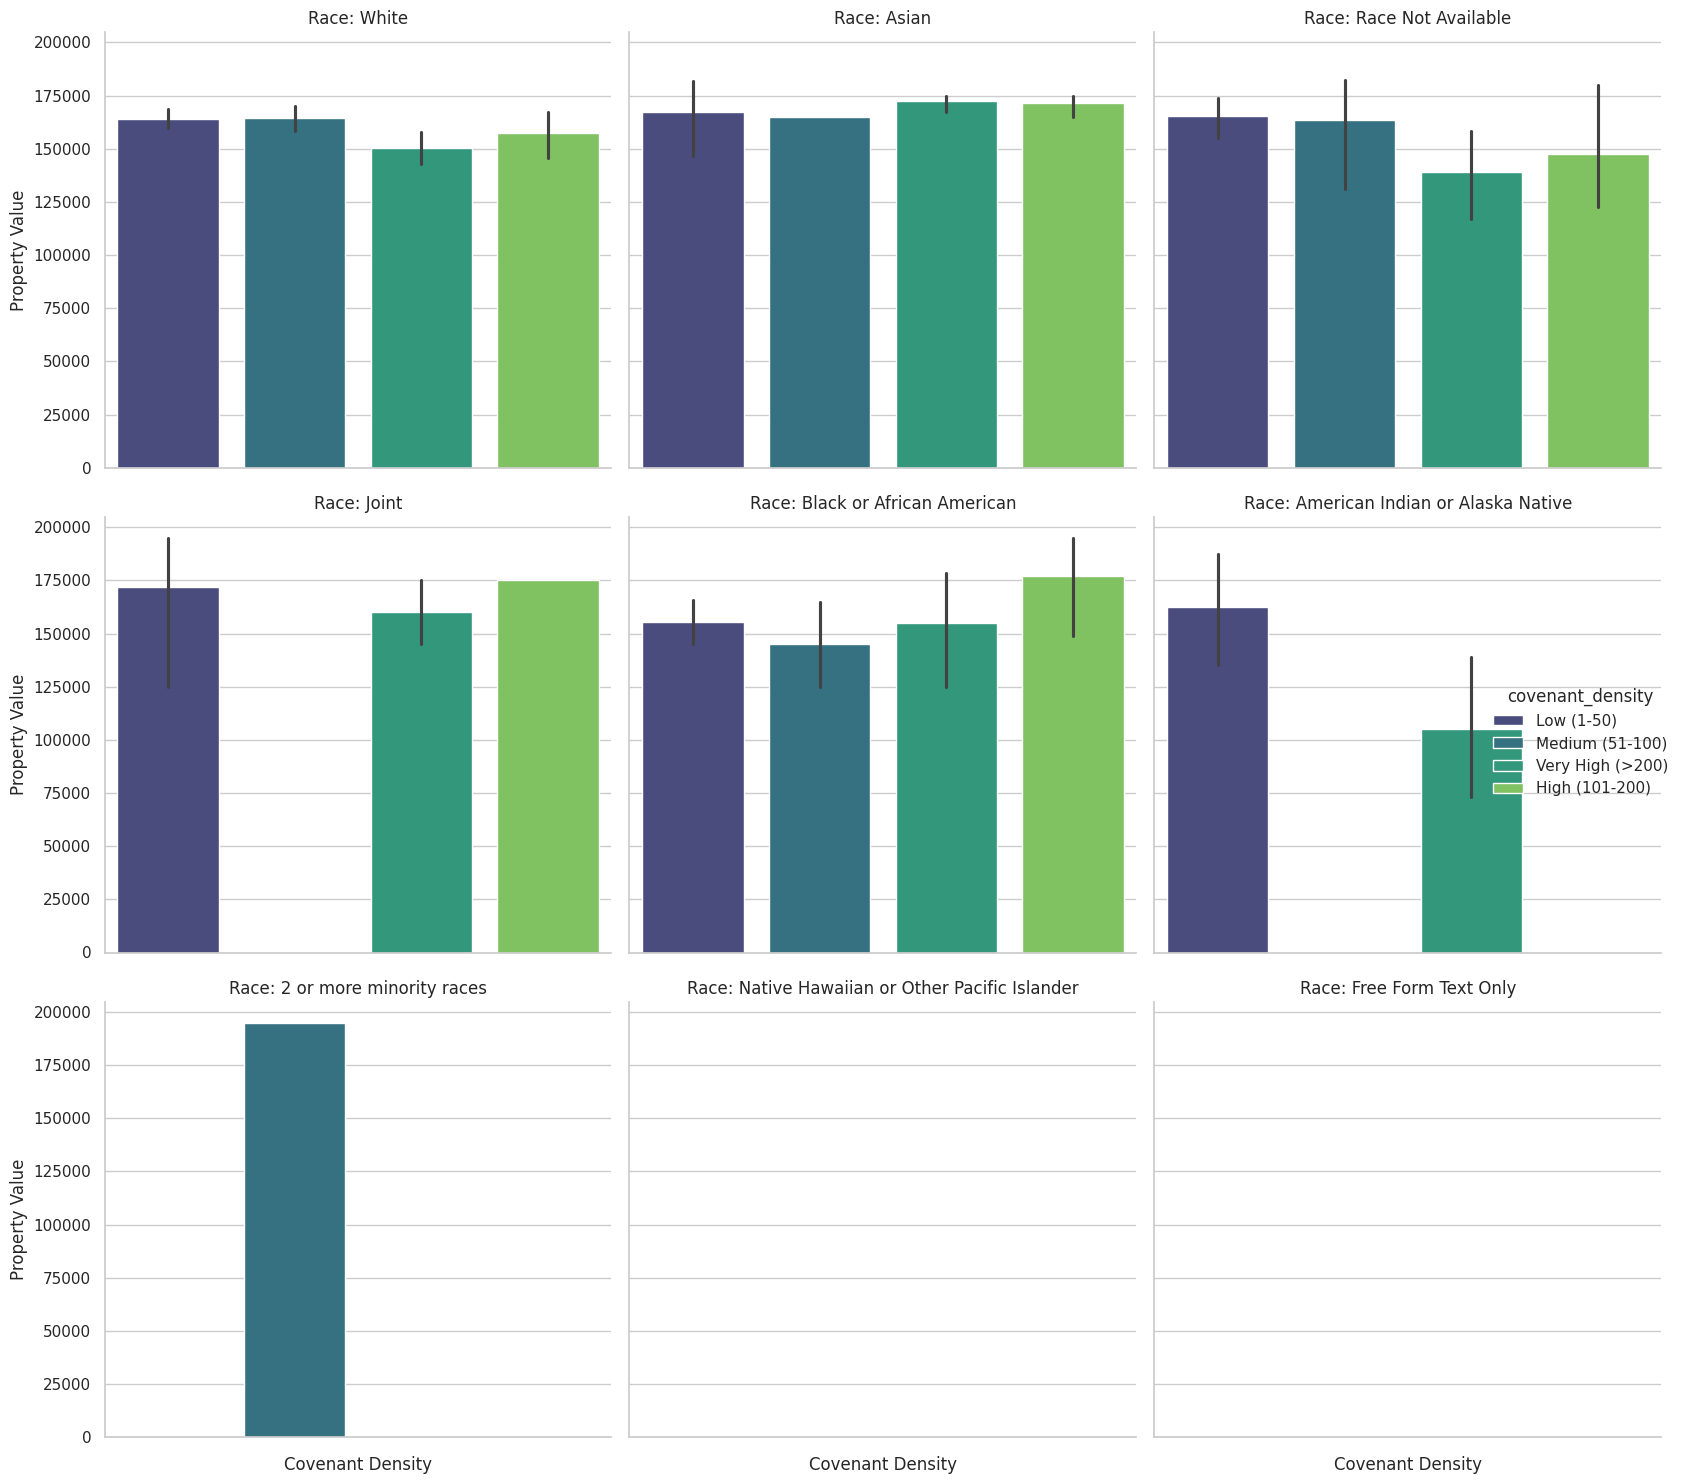

In [351]:
plt.figure(figsize=(12, 6))

# Create a categorical plot with subplots for each race
g = sns.catplot(
    data=df_covenant,
    x="covenant_density",
    y="property_value",
    hue="covenant_density"
,  # Hue differentiates bars
    col="derived_race",
    kind="bar",
    col_wrap=3,  # Adjust for better layout
    palette="viridis",  # Choose a clear color palette
    sharey=True,
    legend=True
)

# Rotate x-axis labels for readability
g.set_xticklabels(rotation=45)

# Set axis labels and titles
g.set_axis_labels("Covenant Density", "Property Value")
g.set_titles("Race: {col_name}")

# Adjust layout
plt.tight_layout()
plt.savefig('covenant_density_vs_property_value.png')
plt.show()



In [343]:

df = pd.get_dummies(df, columns=['derived_race'], drop_first=False, dtype='int')
df = pd.get_dummies(df, columns=['activity_year'], drop_first=False, dtype='int')
df = pd.get_dummies(df, columns=['action_taken'], drop_first=False, dtype='int')

df['was_approved'] = df['was_approved'].map({'True': 1, 'False': 0})
df = df.dropna(subset=['property_value', 'interest_rate', 'income'])

In [344]:
X = df.drop(['census_tract', 'was_approved', 'property_value'], axis=1)
y = df['property_value']

In [345]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [346]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         property_value   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 2.429e+04
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:32:01   Log-Likelihood:            -9.3049e+05
No. Observations:               71330   AIC:                         1.861e+06
Df Residuals:                   71315   BIC:                         1.861e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
